<a href="https://colab.research.google.com/github/Divyanshu86015/machine-learning/blob/main/EDA_with_Algerian_Forest_Fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Algerian Forest Fires Dataset
Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
dataset = pd.read_excel('Algerian_forest_fires_dataset_UPDATE[1].xlsx',header=1)

In [ ]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4   RH           245 non-null    object
 5   Ws           245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


#DATA CLEANING

In [ ]:
## missing values
dataset[dataset.isnull().any(axis=1)]


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The dataset is converted into two sets bassed on Region from 122th index, we can columns bassed on the Resion

1. "Bejai Region Dataset"

2. "Sidi-Bel Abbes Resion Dataset"

Add new columns with region

In [ ]:
dataset.loc[:122,'Region'] = 0
dataset.loc[122:,'Region'] = 1
df = dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4   RH           245 non-null    object 
 5   Ws           245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       247 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [ ]:
df["Region"] = df["Region"].astype(int)

In [ ]:
df.isna().sum()

,0
day,1
month,2
year,2
Temperature,2
RH,2
Ws,2
Rain,2
FFMC,2
DMC,2
DC,2


In [ ]:
df = df.dropna().reset_index(drop=True)

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df.isna().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [ ]:
## remove the 122nd row
df = df.drop(122).reset_index(drop=True)

In [ ]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [ ]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
## fix spaces in columns name:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


# Changes the required columns as integer data type

In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
df[['day', 'month', 'year', 'Temperature', 'RH','Ws']]= df[['day', 'month', 'year', 'Temperature', 'RH','Ws']].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


#Changing the other columns to float data type

In [ ]:
objects= [features for features in df.columns if df[features].dtypes=='O']

In [ ]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [ ]:
for i in objects:
  if i !="Classes":
    df[i]=df[i].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [ ]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [ ]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [ ]:
df['Classes'].value_counts()

,count
Classes,
fire,137
not fire,106


In [ ]:
## let ave the cleaned dataset
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)

# Exploratory Data Analysis

In [ ]:
## drop day,month and year
df_copy = df.drop(['day','month','year'],axis=1)

In [ ]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
## categories in classes
df_copy["Classes"].value_counts()

,count
Classes,
fire,137
not fire,106


In [ ]:
## Encoding of the categorical in classes
df_copy["Classes"]=np.where(df_copy["Classes"].str.contains("not fire"),0,1)

In [ ]:
df_copy["Classes"].value_counts()

,count
Classes,
1,137
0,106


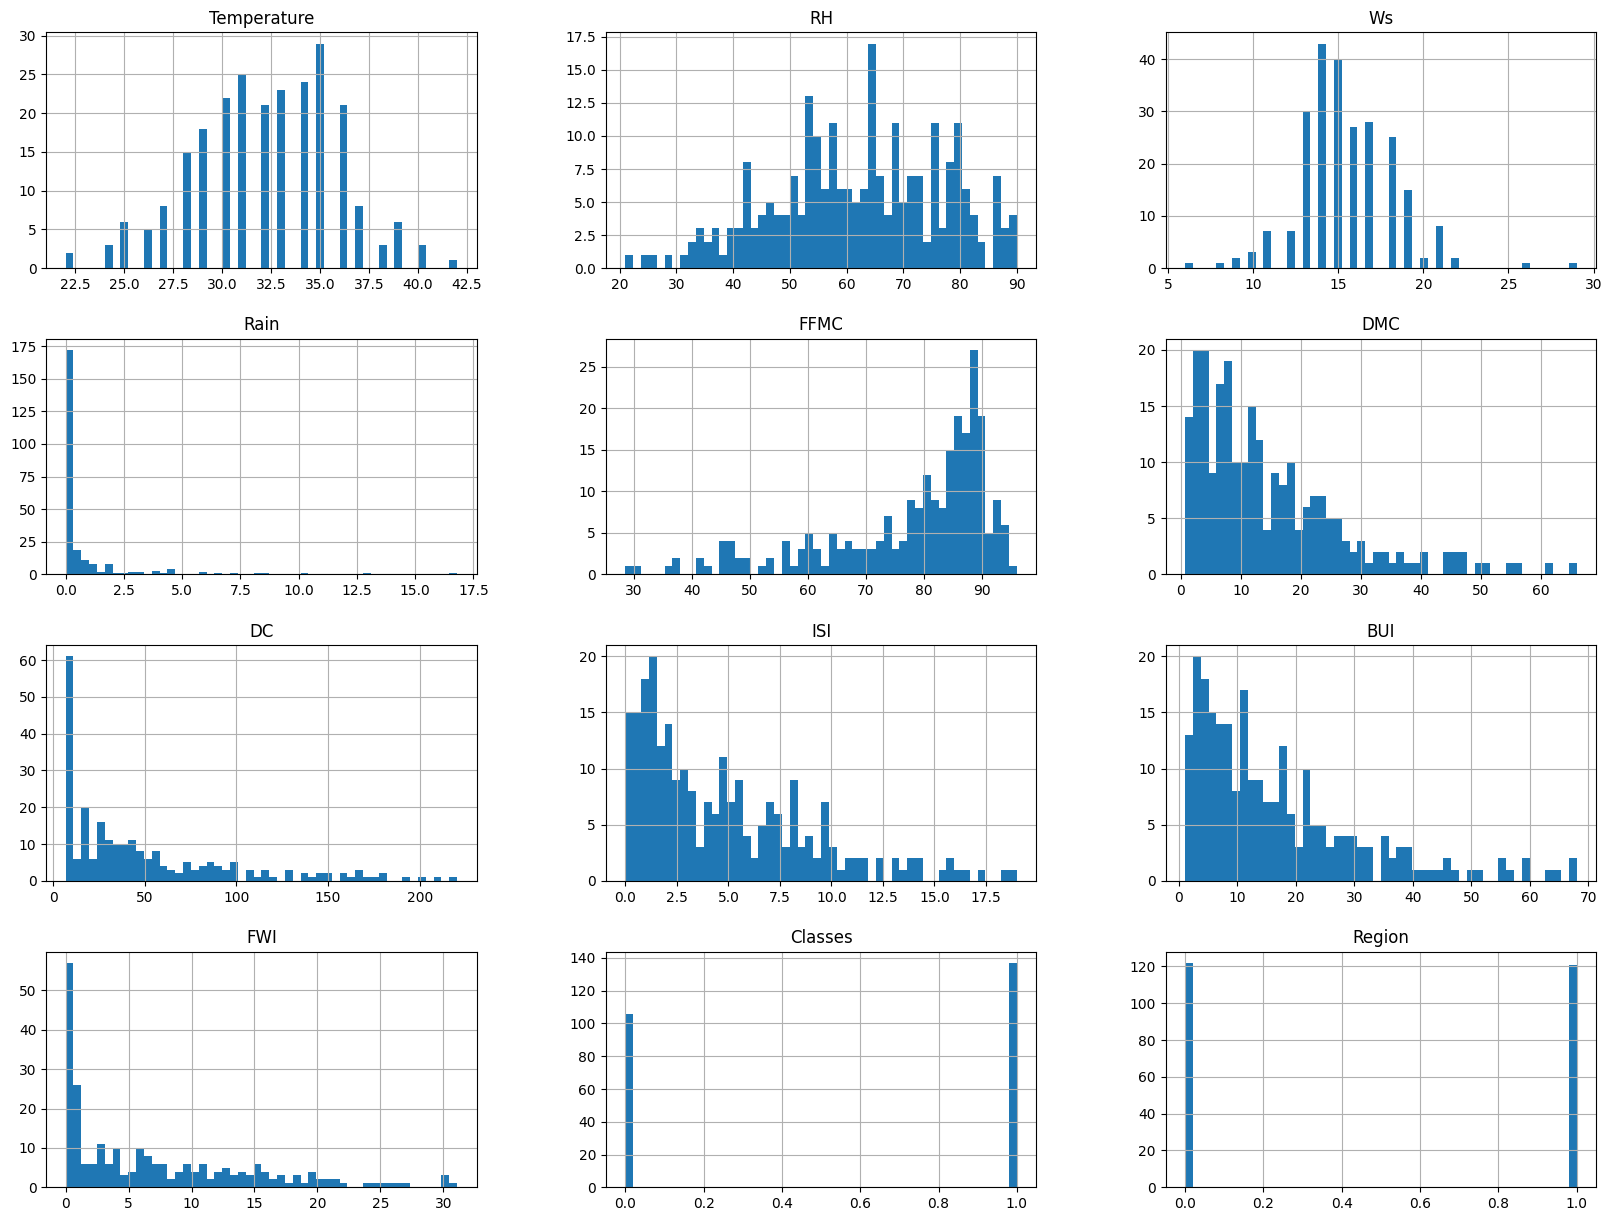

In [ ]:
##plot density plot for all feature
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
##percentage for pie chart
percentage=df_copy["Classes"].value_counts(normalize=True)*100

In [ ]:
percentage

,proportion
Classes,
1,56.378601
0,43.621399


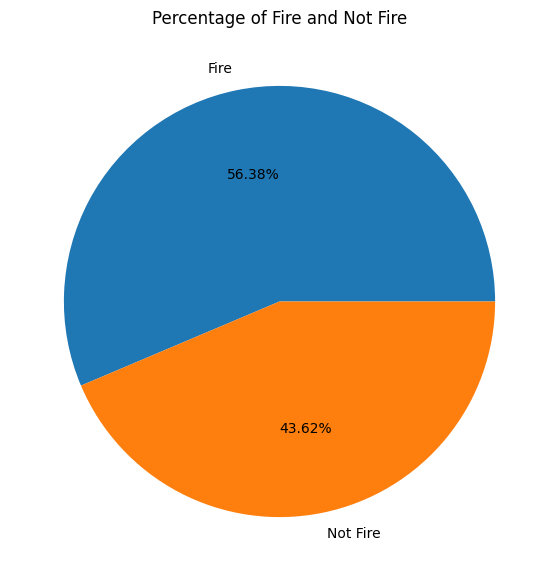

In [ ]:
## plotting piechart
classlabels = ["Fire","Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct="%1.2f%%")
plt.title("Percentage of Fire and Not Fire")
plt.show()


## Correlation


In [ ]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

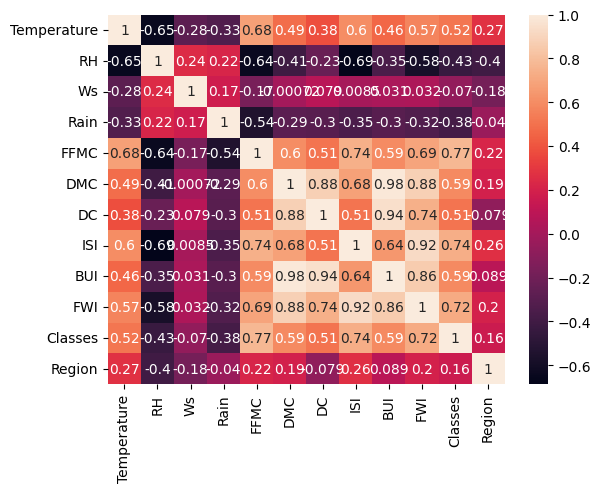

In [ ]:
sns.heatmap(df_copy.corr(),annot=True)

<Axes: ylabel='FWI'>

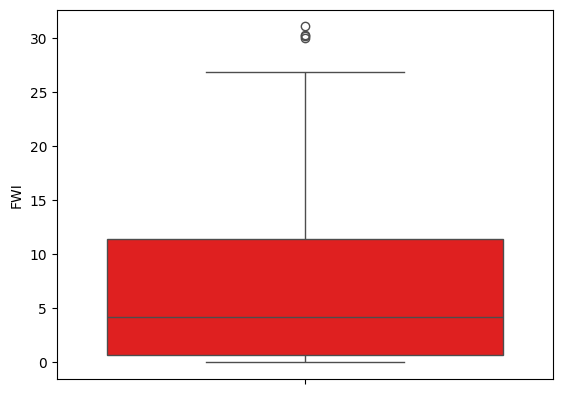

In [ ]:
# Boxplots
sns.boxplot(df["FWI"],color="red")

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

In [ ]:
df["Classes"].value_counts()

,count
Classes,
fire,137
not fire,106


Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

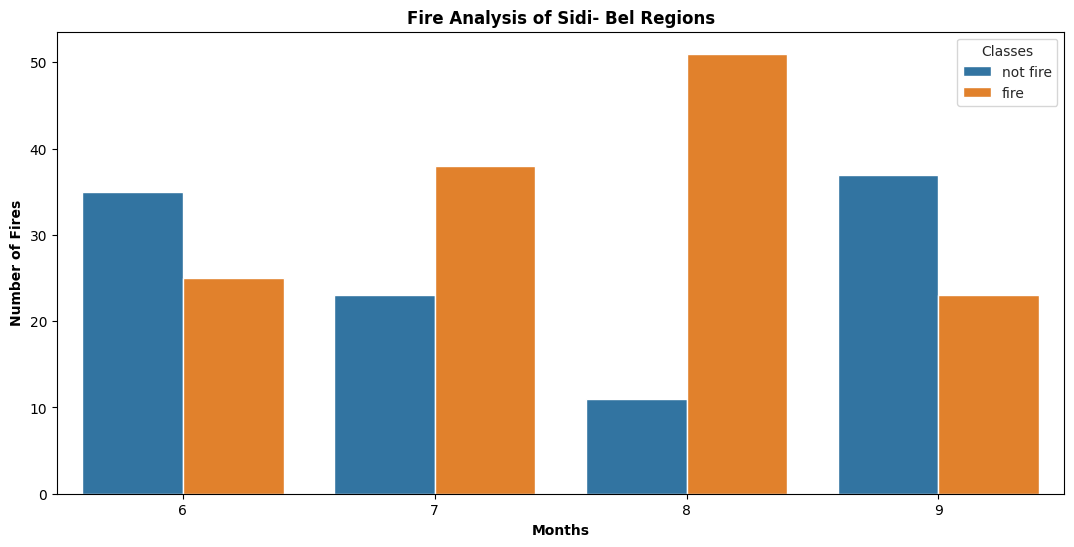

In [ ]:
## Monthly Fire Analysis
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Brjaia Regions')

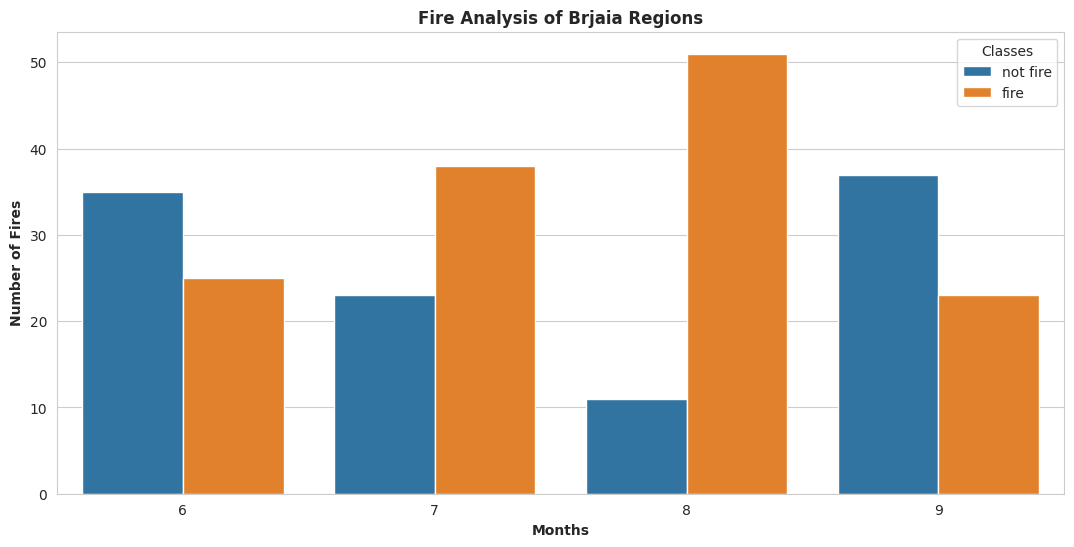

In [ ]:
## Monthly Fire Analysis
dftemp=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Brjaia Regions",weight='bold')

Its observed that August and September had the most number of forest fires for both regions. And from the above plot of months, we can understand few things

Most of the fires happened in August and very high Fires happened in only 3 months - June, July and August.

Less Fires was on September

In [ ]:
## Independent And dependent features
X=df_copy.drop('FWI',axis=1) # Independent feature
y=df_copy['FWI'] ## FWI(Fire Weather Index) is my dependent feature

In [ ]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [ ]:
y

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5
...,...
238,6.5
239,0.0
240,0.2
241,0.7


In [ ]:
# Train Test split of the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((162, 11), (81, 11), (162,), (81,))

# Feature selection


In [ ]:
## feature selection bassed on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653217,-0.294493,-0.306845,0.686784,0.485957,0.387369,0.600649,0.463775,0.515616,0.260966
RH,-0.653217,1.000000,0.200772,0.218350,-0.633803,-0.416955,-0.240523,-0.718725,-0.365222,-0.444497,-0.419498
Ws,-0.294493,0.200772,1.000000,0.247112,-0.178626,0.008702,0.101059,-0.006136,0.043700,-0.062682,-0.216375
Rain,-0.306845,0.218350,0.247112,1.000000,-0.537842,-0.288821,-0.304050,-0.340753,-0.300830,-0.366668,-0.057620
FFMC,0.686784,-0.633803,-0.178626,-0.537842,1.000000,0.624492,0.528396,0.748319,0.611220,0.782922,0.271324
DMC,0.485957,-0.416955,0.008702,-0.288821,0.624492,1.000000,0.869090,0.685568,0.983366,0.617266,0.222615
DC,0.387369,-0.240523,0.101059,-0.304050,0.528396,0.869090,1.000000,0.514349,0.942305,0.547390,-0.046399
ISI,0.600649,-0.718725,-0.006136,-0.340753,0.748319,0.685568,0.514349,1.000000,0.643968,0.733342,0.304554
BUI,0.463775,-0.365222,0.043700,-0.300830,0.611220,0.983366,0.942305,0.643968,1.000000,0.613711,0.127509
Classes,0.515616,-0.444497,-0.062682,-0.366668,0.782922,0.617266,0.547390,0.733342,0.613711,1.000000,0.197291


<Axes: >

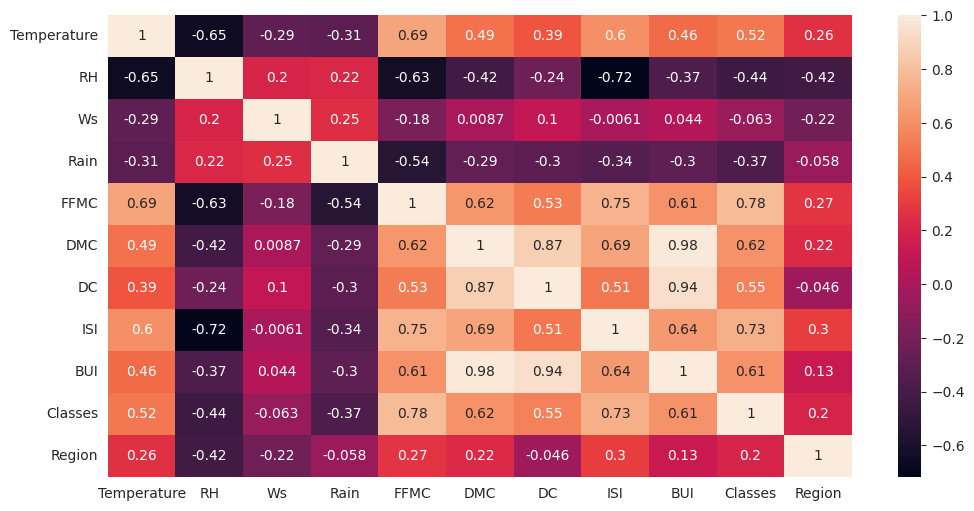

In [ ]:
## Check for multicollinearity
plt.figure(figsize=(12,6))
sns.heatmap(X_train.corr(),annot=True)

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [ ]:
corr_features

{'BUI', 'DC'}

In [ ]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((162, 9), (81, 9))

## Feature Scaling Or Standardization

In [ ]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_test_scaled.shape

(81, 9)

In [ ]:
X_train_scaled.shape

(162, 9)

In [116]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


## Box Plots To understand Effect Of Standard Scaler

Text(0.5, 1.0, 'X_train After Scaling')

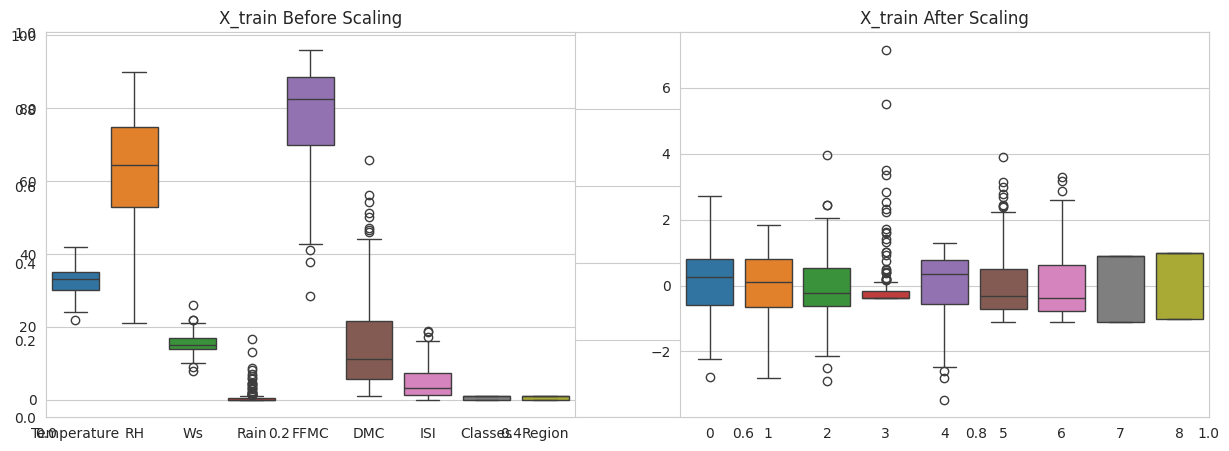

In [ ]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## Model Training

# linear regrssion

In [104]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [ ]:
regressor

LinearRegression()

In [ ]:
regressor.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
## slop
regressor.coef_
## intercept
regressor.intercept_
print("slop----",regressor.coef_)
print("intercept----",regressor.intercept_)

slop---- [-0.05693341 -0.21641732 -0.00951823 -0.03149793 -0.77139422  3.82905181
  4.80465169  0.39430209 -0.40916599]
intercept---- 7.221604938271603


In [ ]:
## prediction
y_pred_test=regressor.predict(X_test_scaled)
y_pred_test

array([ 8.22824619,  7.78215852, -0.25828998,  4.38055759,  6.68222943,
        1.3622597 ,  1.99945794,  7.8355231 ,  1.75018462,  3.38281514,
        0.39430907,  9.77499654,  9.34088351, 17.0031456 , 18.46405093,
        1.27800873,  1.96842081, -0.13276177,  7.16594485,  3.0815781 ,
        1.40741562,  0.18075746,  6.61692105,  0.30350512, 21.01326642,
        5.12525044,  5.95195917,  9.79455912, -0.10781944,  9.74431038,
        6.59526666, -0.41271825, 10.37821088, 14.54681696,  1.534249  ,
        0.44968093,  2.03021843,  6.11533999, -0.58567088, -0.50816843,
        6.70967918,  1.89400102,  8.65548055, -0.39939666, 15.42446579,
        8.30696806,  8.17037058,  1.429858  , 12.91587627,  1.21897904,
       29.50229226,  5.57023   , 17.21300934, 19.44599949, 13.78147012,
       16.16976915,  0.66101829,  8.98278392,  3.59370818, 14.64105141,
        5.14896687,  0.79459158, -0.54252859, 21.87012705,  3.25163001,
        1.75067189,  9.70047411,  6.92953233, 10.47866997, -0.37

In [ ]:
## performance matrix cost function
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("MSE",mean_squared_error(y_test,y_pred_test))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_test)))
print("MAE",mean_absolute_error(y_test,y_pred_test))
## model accuracy
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
print("R2 Score",score)

MSE 0.678909721311723
RMSE 0.8239597813678304
MAE 0.5767877823415987
R2 Score 0.9845563190792226


## Ridge Regression model

In [ ]:
## Ridge Regression
from sklearn.linear_model import Ridge
ridge=Ridge()

In [ ]:
ridge

Ridge()

In [ ]:
ridge.fit(X_train_scaled,y_train)
## prediction

y_pred=ridge.predict(X_test_scaled)
## performance matrix cost function
mae=mean_absolute_error(y_test,y_pred)

## model accuracy
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.5953582907340912
R2 Score 0.9839564989246832


## Lasso Regression


In [ ]:
## lasso Regression
from sklearn.linear_model import Lasso
lasso=Lasso()

In [ ]:
lasso

Lasso()

In [ ]:
lasso.fit(X_train_scaled,y_train)
## prediction

y_pred=lasso.predict(X_test_scaled)
## performance matrix cost function
mae=mean_absolute_error(y_test,y_pred)

## model accuracy
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.1053469612945104
R2 Score 0.9514102148198663


## Elasticnet regression


In [ ]:
## Elasticnet regression
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()

In [ ]:
elastic.fit(X_train_scaled,y_train)
## prediction

y_pred=elastic.predict(X_test_scaled)
## performance matrix cost function
mae=mean_absolute_error(y_test,y_pred)

## model accuracy
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)


Mean absolute error 1.834545337587552
R2 Score 0.8825431896054333


In [ ]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))

In [105]:
!pip install flask-ngrok

In [110]:
import warnings
warnings.filterwarnings('ignore')

In [119]:
from google.colab.output import eval_js
print(eval_js("google.colab.kernel.proxyPort(5000)"))
from flask_ngrok import run_with_ngrok
from flask import Flask,request,jsonify,render_template
import pickle
app = Flask(__name__)
run_with_ngrok(app)

## import ridge regressor model and standard scaler pickle
ridge_model= pickle.load(open('ridge.pkl','rb'))
standard_scaler= pickle.load(open('scaler.pkl','rb'))


## rout for home page
@app.route("/")
def index():
  return render_template('index.html')

## rout for single data point prediction
@app.route("/predictdata",methods=["GET","Post"])
def predict_datapoint():
  if request.method=="POST":
    Temperature=float(request.form.get("Temperature"))
    RH=float(request.form.get("RH"))
    Ws=float(request.form.get("Ws"))
    Rain=float(request.form.get("Rain"))
    FFMC=float(request.form.get("FFMC"))
    DMC=float(request.form.get("DMC"))
    ISI=float(request.form.get("ISI"))
    Classes=float(request.form.get("Classes"))
    Region=float(request.form.get("Region"))

    new_data_scaled=standard_scaler.transform([[Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region]])
    result=ridge_model.predict(new_data_scaled)

    return render_template("home.html",result=result[0])


  else:
    return render_template('home.html')


if __name__ == "__main__":
  app.run()

https://ife6fs3y8-496ff2e9c6d22116-5000-colab.googleusercontent.com/
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-41:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
           